In [47]:
# Import Required Libraries
import pandas as pd
import pickle
import numpy as np

### Import Data Sample

In [102]:
# Auxillary Test File (Unmodified)
file = open('./Data/flight_2019_sample','rb')
sample_2019 = pickle.load(file)
file.close()

In [103]:
# Feature Engineered DataFrame
data_feature_modified = pd.read_csv('./Data/Feature_data_sample.csv')

### Adjust NaN Values and Prune Columns With more than 30% NaN Values

In [113]:
# Retrieve only columns with less than 30% NaN values
Flight_sample = data_feature_modified.loc[:, data_feature_modified.isnull().mean() < .3]
Flight_sample.drop(['tail_num'],axis=1, inplace=True)

C:\Users\russe\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
# Get columns with NaN values present
NaN_cols = Flight_sample.columns[Flight_sample.isnull().any()]

In [115]:
# View Column % NaN Values
Flight_sample[NaN_cols].isna().sum()/len(Flight_sample)*100

dep_time               1.718452
dep_delay              1.718763
taxi_out               1.771638
wheels_off             1.771638
wheels_on              1.826691
taxi_in                1.826691
arr_time               1.826691
arr_delay              2.036741
actual_elapsed_time    2.036741
air_time               2.036741
dtype: float64

In [116]:
# Adjust NaN values by replacing them with respective column means to prevent data loss
for column in NaN_cols:
    Flight_sample[column].fillna(value=Flight_sample[column].mean(), inplace=True)

C:\Users\russe\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
Flight_sample[NaN_cols].isna().sum()/len(Flight_sample)*100

dep_time               0.0
dep_delay              0.0
taxi_out               0.0
wheels_off             0.0
wheels_on              0.0
taxi_in                0.0
arr_time               0.0
arr_delay              0.0
actual_elapsed_time    0.0
air_time               0.0
dtype: float64

In [117]:
# Find any records with multiple flights, if none - then remove column from dataset as all values are 1
print(Flight_sample.loc[Flight_sample['flights'] == 0.0])
print(Flight_sample.loc[Flight_sample['flights'] < 1.0])
Flight_sample.drop(['flights','year'], axis=1, inplace=True)

Empty DataFrame
Columns: [mkt_unique_carrier, branded_code_share, mkt_carrier_fl_num, op_unique_carrier, op_carrier_fl_num, origin_airport_id, dest_airport_id, crs_dep_time, dep_time, dep_delay, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_time, arr_time, arr_delay, cancelled, diverted, dup, crs_elapsed_time, actual_elapsed_time, air_time, flights, distance, fl_date, year, is_delayed, flight_speed, flight_haul_type, flight_month, arrival_hour_of_day, departure_hour_of_day, percent_delay, percent_flights, avg_flights, avg_passengers, total_distance, total_passengers, avg_fuel, state, avgCloud, avgDryDays, avgRainDays, avgSnowDays, avgThunderDays, early_count, early_avgDryDays, early_avgRainDays, early_avgCloud, early_avgSnowDays, delay_count, delay_avgDryDays, delay_avgRainDays, delay_avgCloud, delay_avgSnowDays]
Index: []

[0 rows x 56 columns]
Empty DataFrame
Columns: [mkt_unique_carrier, branded_code_share, mkt_carrier_fl_num, op_unique_carrier, op_carrier_fl_num, origin_airport

C:\Users\russe\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Determine correlated Feature Data

In [118]:
# Calculate Correlated features from sample
Corr = Flight_sample.corr(method ='pearson')

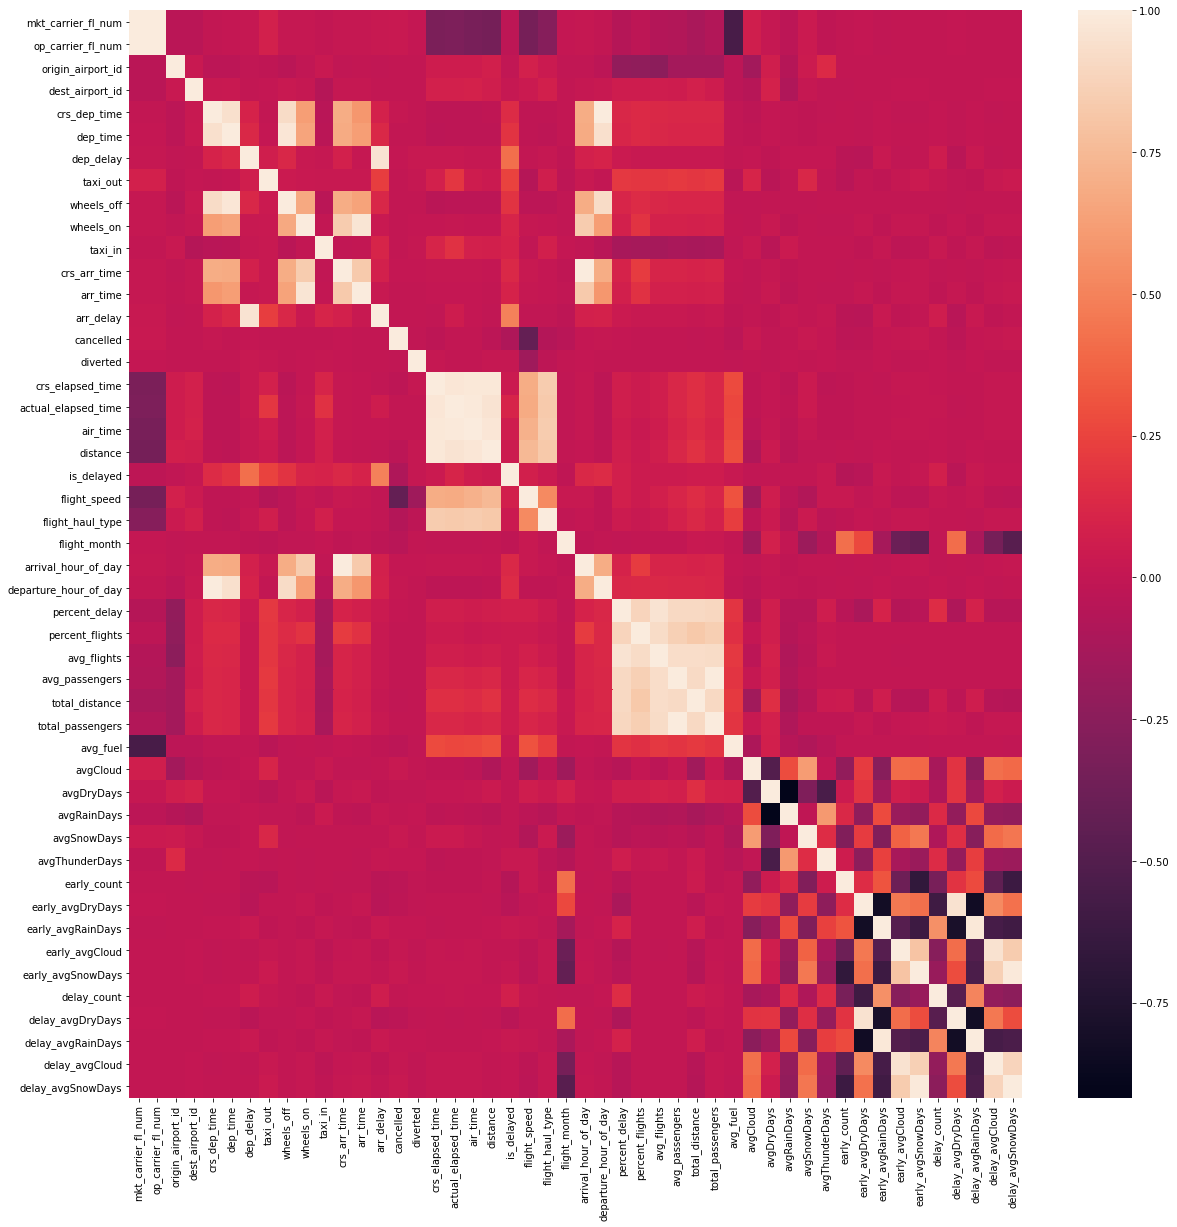

In [119]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sn.heatmap(Corr, annot=False)
plt.show()

In [120]:
Corr = Corr.abs()

In [121]:
# Drop 100% correlational values(diagonal values in matrix)
Corr2 = Corr[Corr < 1].unstack().transpose().sort_values(ascending=False).drop_duplicates()

In [132]:
# Get all correlation data above threshold value
threshold = 0.60
Corr2 = Corr1[Corr1 > threshold]

# Extract all feature names from correlations above threshold
Corr_features = Corr1.index.values

# Flatten into list format
lst = [Corr_features[x][y] for x in range(len(Corr_features)) for y in range(2)]

# Isolate Unique feature names
unique_features = list(set(lst))
unique_features

['wheels_off',
 'avgRainDays',
 'delay_avgSnowDays',
 'percent_flights',
 'arr_delay',
 'mkt_carrier_fl_num',
 'op_carrier_fl_num',
 'distance',
 'avg_flights',
 'early_avgDryDays',
 'delay_avgCloud',
 'early_avgSnowDays',
 'wheels_on',
 'flight_speed',
 'early_avgRainDays',
 'arr_time',
 'crs_dep_time',
 'delay_avgDryDays',
 'early_avgCloud',
 'total_distance',
 'total_passengers',
 'avgDryDays',
 'avgCloud',
 'crs_arr_time',
 'departure_hour_of_day',
 'actual_elapsed_time',
 'flight_haul_type',
 'early_count',
 'dep_time',
 'dep_delay',
 'air_time',
 'crs_elapsed_time',
 'arrival_hour_of_day',
 'delay_avgRainDays',
 'percent_delay',
 'avg_passengers',
 'avgSnowDays']

### Prune Data Sample

In [133]:
# Keep features with high correlations
Sample_data = Flight_sample[unique_features]

In [134]:
# Export Sample Data
file = './Data/Sample_Dataset'
outfile = open(file,'wb')
pickle.dump(Sample_data,outfile)
outfile.close()

In [135]:
import gc
collected = gc.collect()
print("Garbage collector: collected", 
          "%d objects." % collected) 

Garbage collector: collected 160355 objects.
